<a href="https://colab.research.google.com/github/siqueirago/Criando-modelo-de-previs-o/blob/main/Cats_and_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
!unzip cats_and_dogs_filtered.zip

In [4]:
!rm -rf cats_and_dogs_filtered.zip

In [ ]:
!pip install tensorflow keras numpy matplotlib

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [8]:
nome_classes = ['gato', 'cachorro']

##**Validação do Modelo**

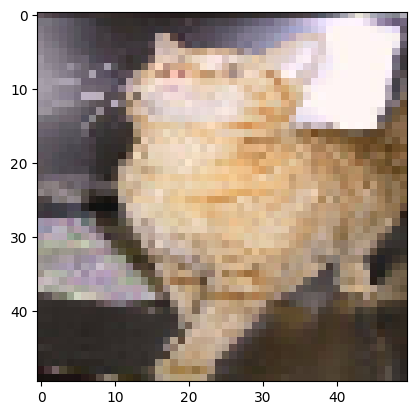

In [85]:
plt.figure()
plt.imshow(validation_generator[0][0][5]) # Access the first image in the first batch
plt.show()


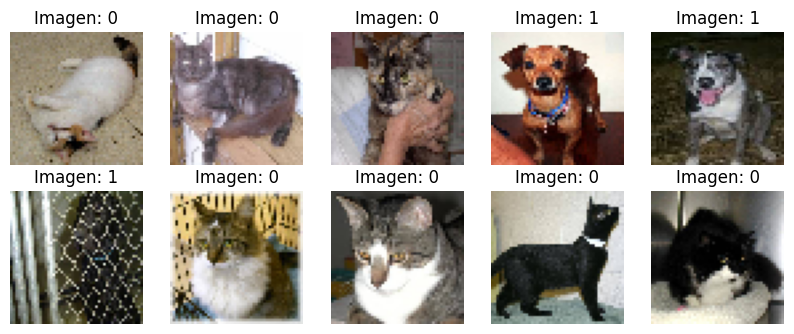

In [86]:
import matplotlib.pyplot as plt

# Access the first batch of images and labels
images, labels = next(train_generator) # Use next(train_generator) to get the next batch

# Plot the first 10 images and labels
plt.figure(figsize=(10, 10))
for i in range(0, 10):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i])
    plt.title(f"Imagen: {int(labels[i])}")
    plt.axis("off")

plt.show()

In [90]:

model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
    ])

In [91]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [92]:
model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 154ms/step - accuracy: 0.5191 - loss: 1.0841 - val_accuracy: 0.5690 - val_loss: 0.6620
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 151ms/step - accuracy: 0.6351 - loss: 0.6355 - val_accuracy: 0.6150 - val_loss: 0.6333
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 164ms/step - accuracy: 0.6935 - loss: 0.5653 - val_accuracy: 0.6840 - val_loss: 0.6080
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 162ms/step - accuracy: 0.7915 - loss: 0.4679 - val_accuracy: 0.6420 - val_loss: 0.6557
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 151ms/step - accuracy: 0.8016 - loss: 0.4250 - val_accuracy: 0.6740 - val_loss: 0.6219
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 168ms/step - accuracy: 0.8638 - loss: 0.3375 - val_accuracy: 0.6950 - val_loss: 0.6143
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 151ms/step - accuracy: 0.9133 - loss: 0.2710 - val_accuracy: 0.6910 - val_loss: 0.6774
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 144ms/step - accuracy: 0.9204 - loss: 0.2255 - val_accu

In [97]:
# Assuming 'validation_generator' is your data generator for validation data
test_loss, test_acc = model.evaluate(validation_generator)
print('\nTest accuracy:', test_acc)

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.6905 - loss: 0.8271

Test accuracy: 0.6850000023841858


In [122]:
predictions = model.predict(validation_generator)
predictions[12]

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step


array([0.22411767, 0.77588224], dtype=float32)

In [123]:
nome_classes[np.argmax(predictions[12])]

'cachorro'

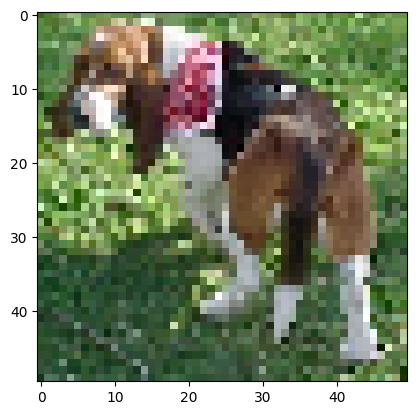

In [124]:
teste = validation_generator[0][0][12]
teste.shape
plt.imshow(teste)